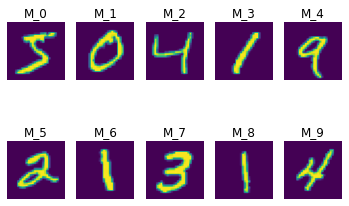

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dens

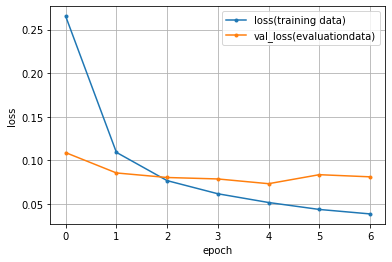

In [4]:
# coding: utf-8
# MNIST example

# 匯入keras
import keras

# 除了MNIST資料之外，也匯入必要的模組
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

# 定義批次大小、類別數、epoch數
batch_size = 128
num_classes = 10
epochs = 20

# 讀取MNIST資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 只顯示MNIST資料裡的10張圖
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

# 將影像正規化
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 顯示以確認
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 製作模型
model = Sequential()

# 第一層
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 第二層
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 第三層
model.add(Dense(10))
model.add(Activation('softmax'))

# 輸出模型
model.summary()

# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

# 進行訓練
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])


# 顯示訓練結果
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()